In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


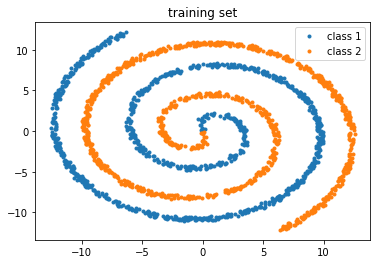

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, Y = twospirals(1000)

plt.title('training set')
plt.plot(X[Y==0,0], X[Y==0,1], '.', label='class 1')
plt.plot(X[Y==1,0], X[Y==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x=[1,2,3,4,5,6,7]
y=[50,51,52,48,47,49,46]
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7]
[50, 51, 52, 48, 47, 49, 46]


In [30]:
class NeuralNetwork_tanh(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def tanh(self, x, der=False):
        if der == True:
            return 1-x**2
        else:
            return (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.tanh(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.tanh(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.tanh(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.tanh(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [31]:
NN = NeuralNetwork_tanh()

err = []
for i in range(10000):
    #NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

KeyboardInterrupt: 